<a href="https://colab.research.google.com/github/Masontysom/CybeRaptor/blob/main/CybeRaptor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix



In [106]:
data0 = pd.read_csv('train.csv')
data0.head()

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...


In [107]:
data0.shape

(93686, 3)

In [108]:
data0.columns

Index(['category', 'sub_category', 'crimeaditionalinfo'], dtype='object')

In [109]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93686 entries, 0 to 93685
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            93686 non-null  object
 1   sub_category        87095 non-null  object
 2   crimeaditionalinfo  93665 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB


In [110]:
# Fill missing values in 'sub_category' with 'Unknown'
data0['sub_category'].fillna('Unknown', inplace=True)

# Fill missing values in 'crimeaditionalinfo' with 'No additional info'
data0['crimeaditionalinfo'].fillna('No additional info', inplace=True)


<ipython-input-110-14b80eff0163>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data0['sub_category'].fillna('Unknown', inplace=True)
<ipython-input-110-14b80eff0163>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

<ipython-input-111-a41e6bc32d98>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


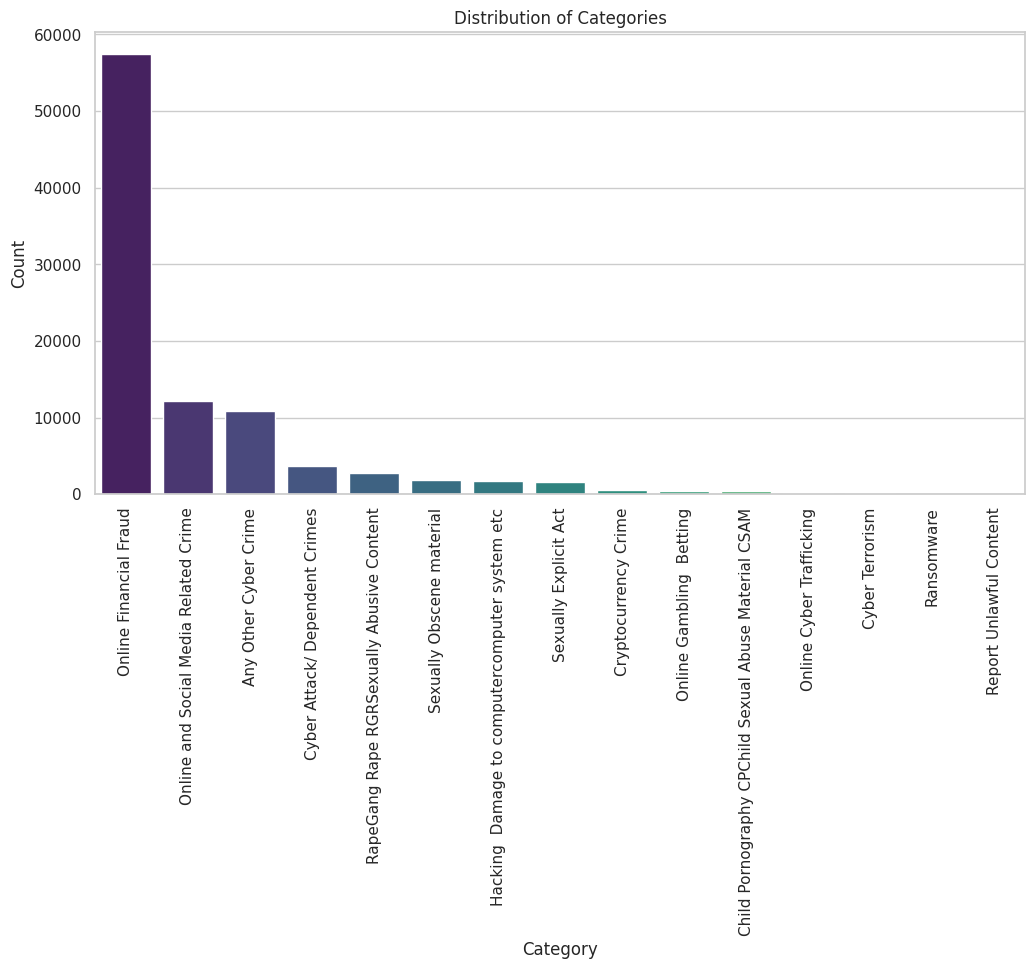

<ipython-input-111-a41e6bc32d98>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sub_category_counts.index, y=sub_category_counts.values, palette="magma")


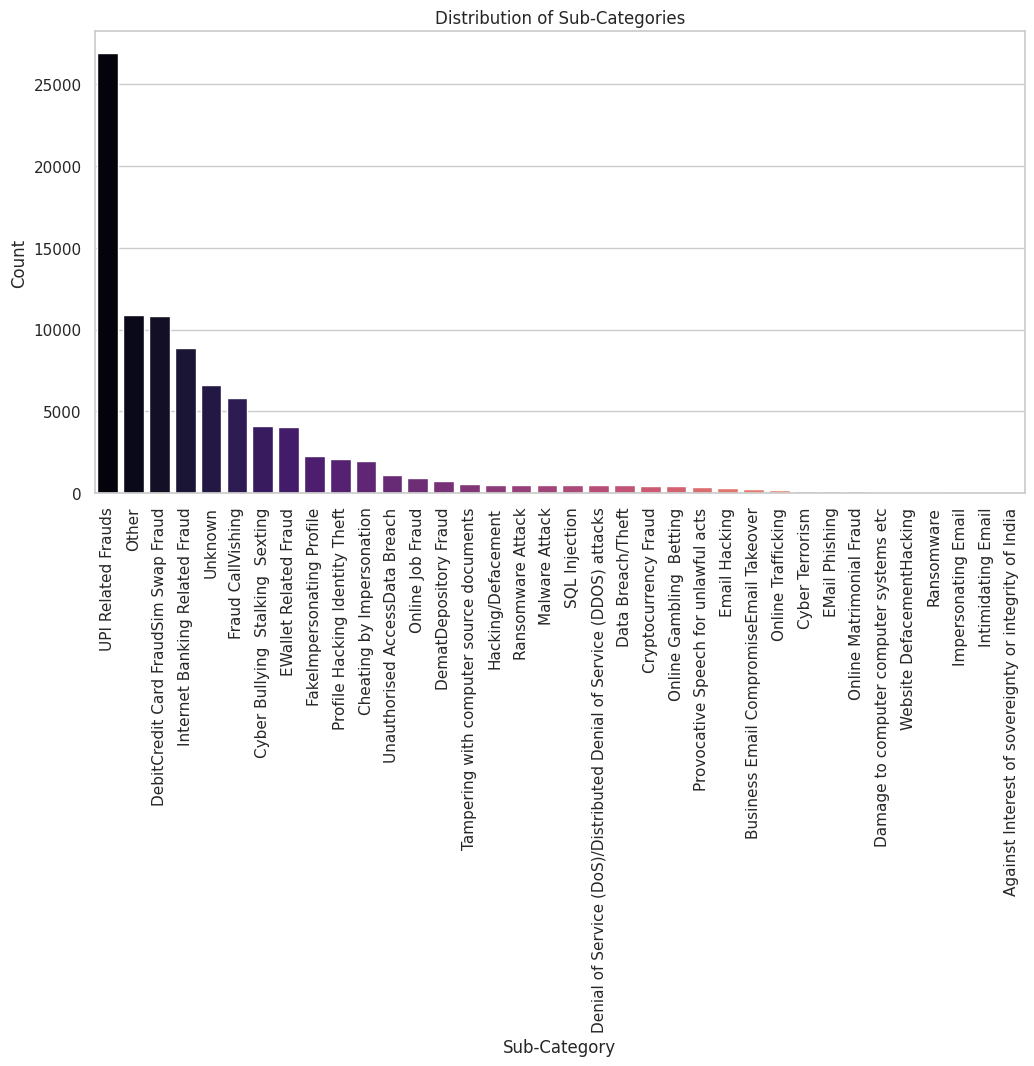

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set plot style
sns.set(style="whitegrid")

# Plot distribution of categories
plt.figure(figsize=(12, 6))
category_counts = data0['category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Distribution of Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

# Plot distribution of sub-categories
plt.figure(figsize=(12, 6))
sub_category_counts = data0['sub_category'].value_counts()
sns.barplot(x=sub_category_counts.index, y=sub_category_counts.values, palette="magma")
plt.xticks(rotation=90)
plt.title("Distribution of Sub-Categories")
plt.xlabel("Sub-Category")
plt.ylabel("Count")
plt.show()


In [116]:
# Check if there are any remaining missing values
print(data0.isnull().sum())


category                0
sub_category            0
crimeaditionalinfo      0
category_encoded        0
sub_category_encoded    0
dtype: int64


In [117]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
label_encoder = LabelEncoder()

# Encode 'category' and 'sub_category'
data0['category_encoded'] = label_encoder.fit_transform(data0['category'])
data0['sub_category_encoded'] = label_encoder.fit_transform(data0['sub_category'])

# View the first few rows to confirm encoding
data0.head()


,category,sub_category,crimeaditionalinfo,category_encoded,sub_category_encoded
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...,9,4
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...,7,15
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...,8,21
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...,9,22
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...,7,15


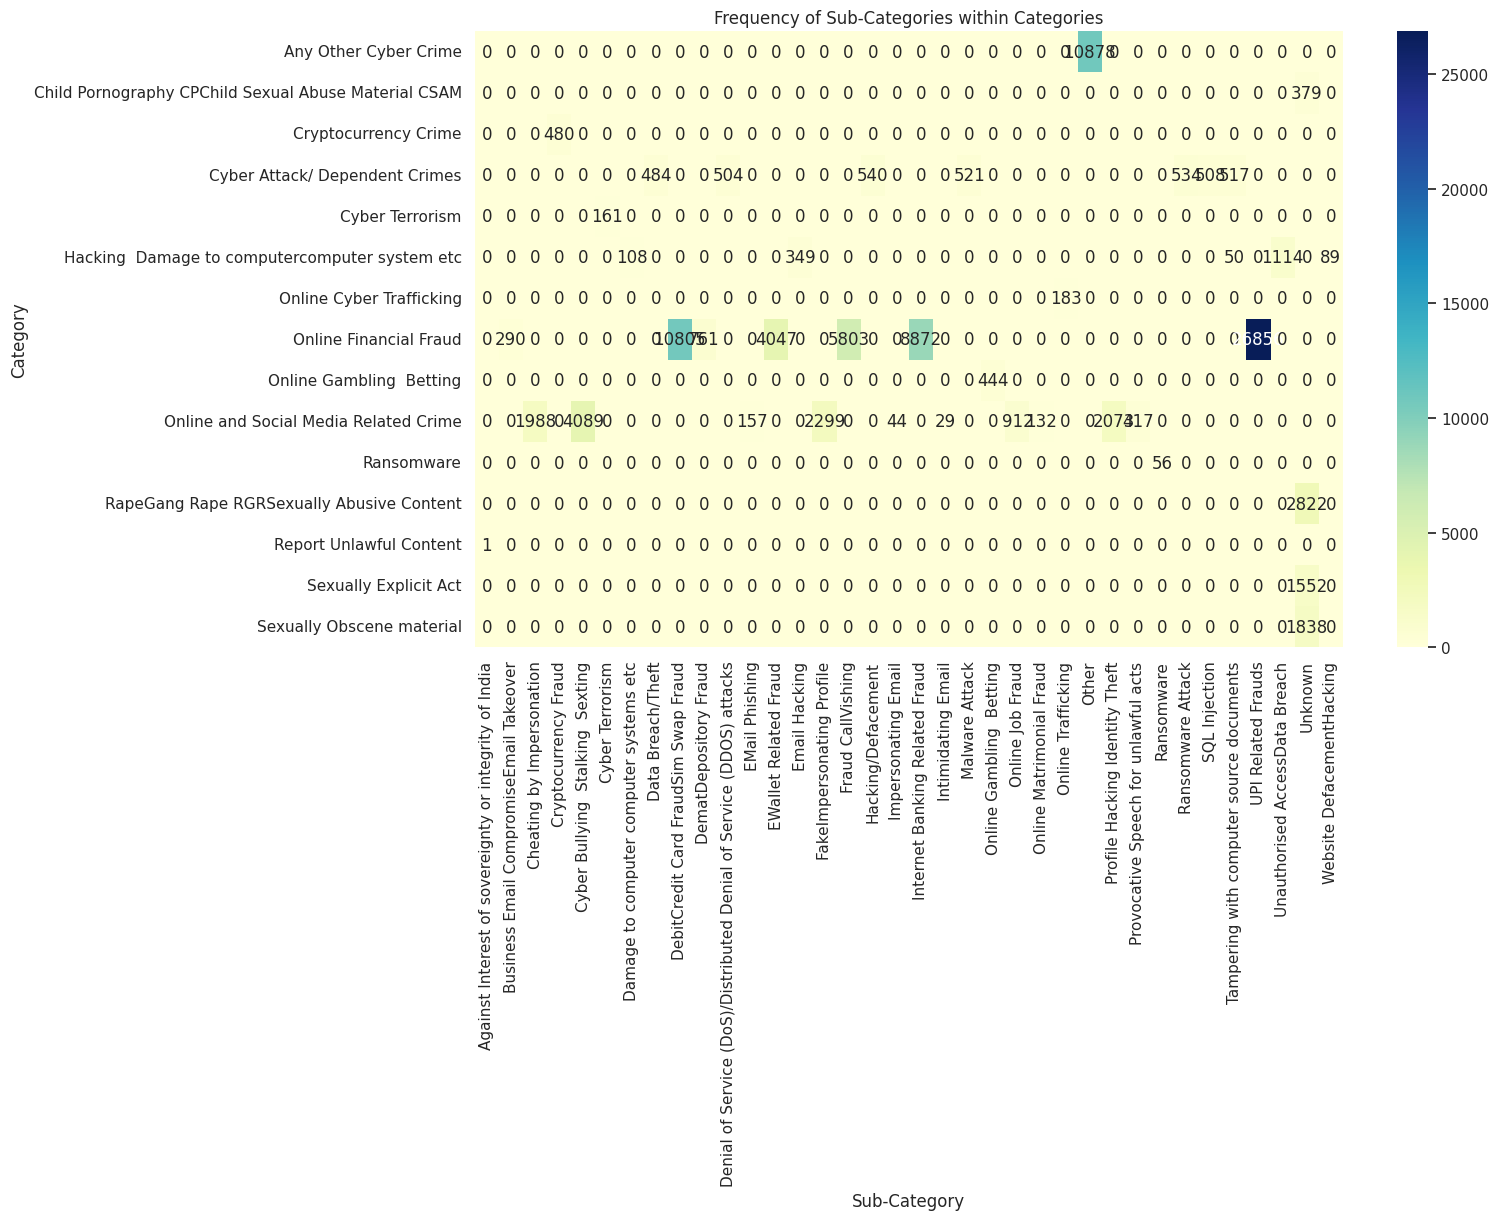

In [118]:
# Create a pivot table for the heatmap
pivot_table = data0.pivot_table(index='category', columns='sub_category', aggfunc='size', fill_value=0)

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title("Frequency of Sub-Categories within Categories")
plt.xlabel("Sub-Category")
plt.ylabel("Category")
plt.xticks(rotation=90)
plt.show()


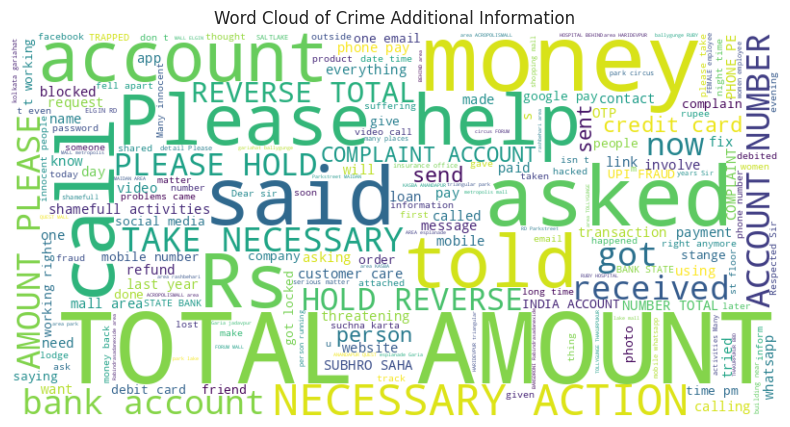

In [115]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text in 'crimeaditionalinfo' for word cloud generation
text_data = " ".join(str(text) for text in data0['crimeaditionalinfo'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Crime Additional Information")
plt.show()


category
Online Financial Fraud                                  0.613048
Online and Social Media Related Crime                   0.129582
Any Other Cyber Crime                                   0.116111
Cyber Attack/ Dependent Crimes                          0.038512
RapeGang Rape RGRSexually Abusive Content               0.030122
Sexually Obscene material                               0.019619
Hacking  Damage to computercomputer system etc          0.018252
Sexually Explicit Act                                   0.016566
Cryptocurrency Crime                                    0.005123
Online Gambling  Betting                                0.004739
Child Pornography CPChild Sexual Abuse Material CSAM    0.004045
Online Cyber Trafficking                                0.001953
Cyber Terrorism                                         0.001719
Ransomware                                              0.000598
Report Unlawful Content                                 0.000011
Name: proportion

<ipython-input-119-26d12d1f18e3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


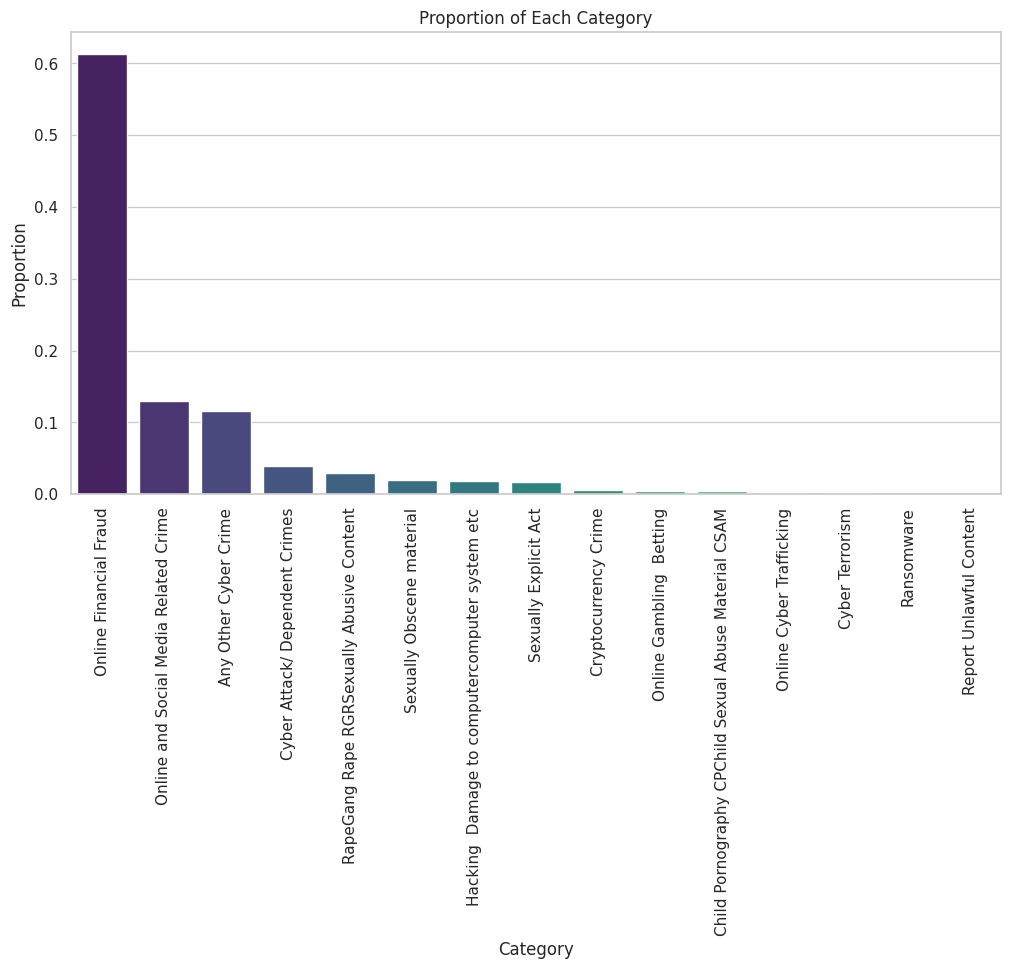

In [119]:
# Check the distribution of categories
category_counts = data0['category'].value_counts(normalize=True)
print(category_counts)

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Proportion of Each Category")
plt.xlabel("Category")
plt.ylabel("Proportion")
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Category: Any Other Cyber Crime
Top Keywords: [('number', 6162), ('money', 5291), ('loan', 5167), ('call', 4953), ('account', 4901), ('rs', 4793), ('amount', 4466), ('please', 3739), ('pay', 3521), ('bank', 3217)]


Category: Child Pornography CPChild Sexual Abuse Material CSAM
Top Keywords: [('please', 262), ('sir', 167), ('video', 148), ('call', 139), ('take', 132), ('help', 126), ('action', 116), ('hai', 113), ('account', 102), ('already', 100)]


Category: Cryptocurrency Crime
Top Keywords: [('money', 440), ('app', 376), ('amount', 273), ('account', 264), ('group', 232), ('invested', 207), ('crypto', 176), ('please', 175), ('help', 173), ('also', 171)]


Category: Cyber Attack/ Dependent Crimes
Top Keywords: [('even', 9886), ('everything', 9024), ('it’s', 9018), ('like', 7260), ('got', 5429), ('email', 5416), ('fix', 4514), ('one', 4514), ('anymore', 4492), ('stange', 4070)]


Category: Cyber Terrorism
Top Keywords: [('loan', 96), ('number', 90), ('app', 77), ('call', 66), ('money'

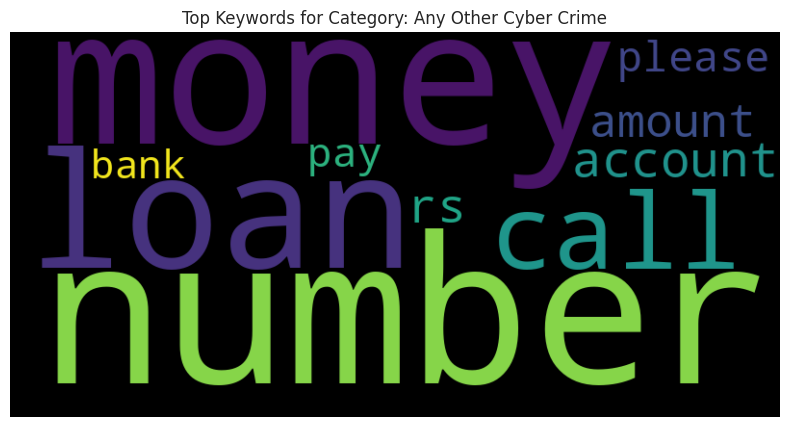

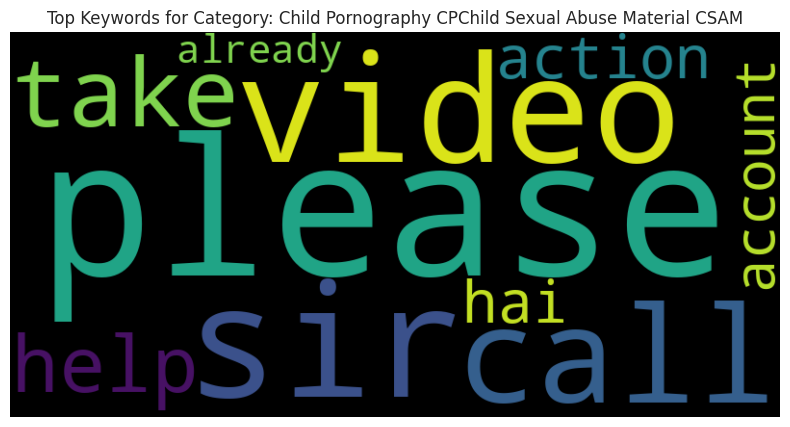

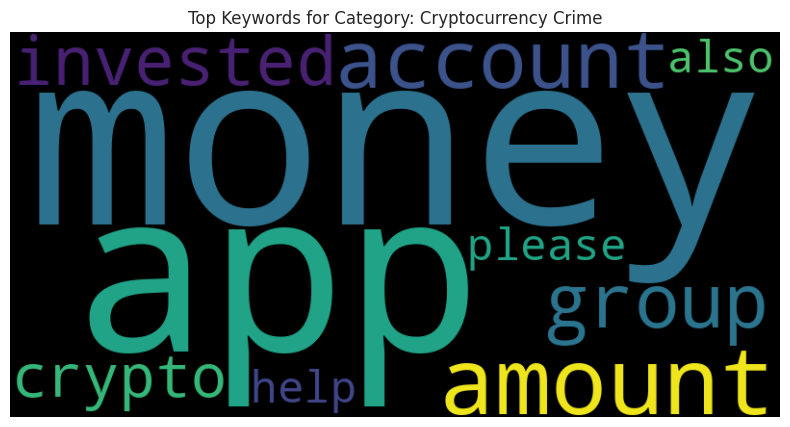

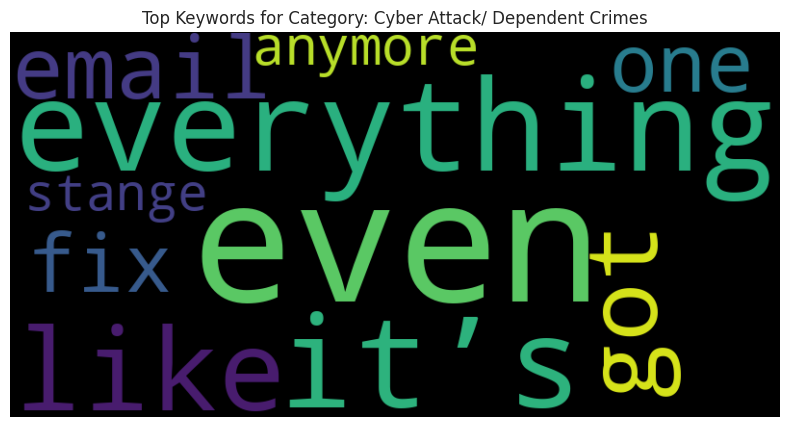

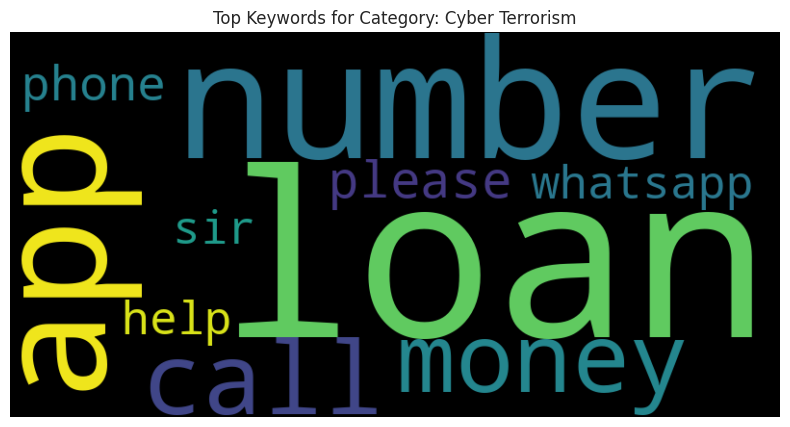

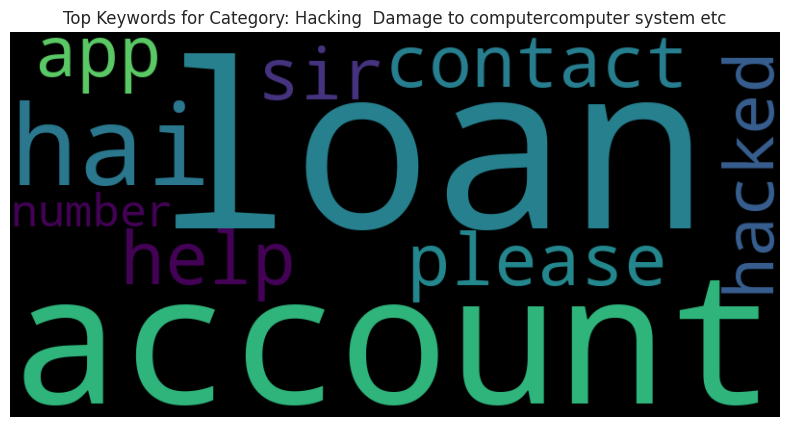

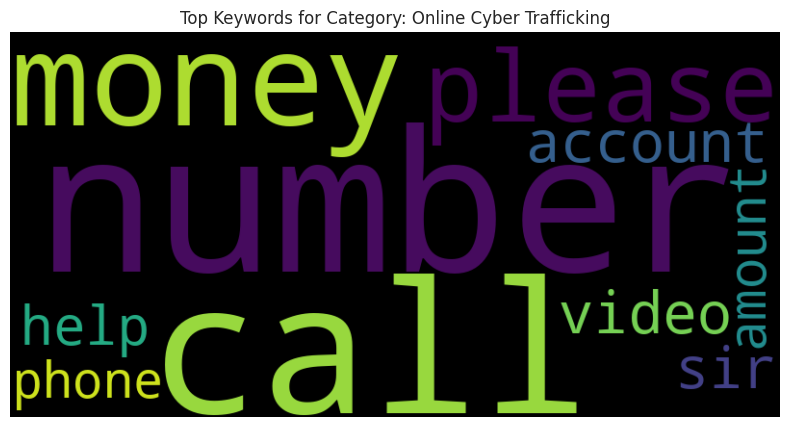

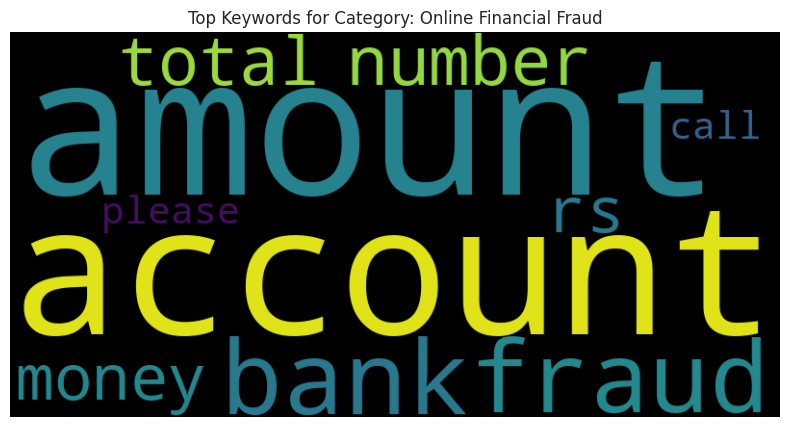

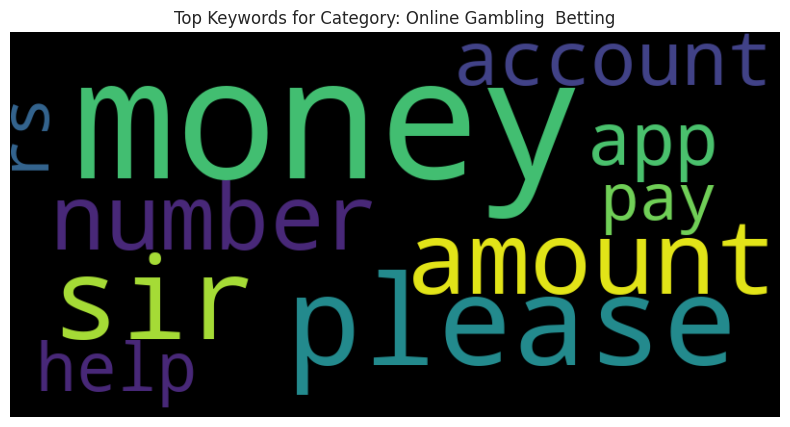

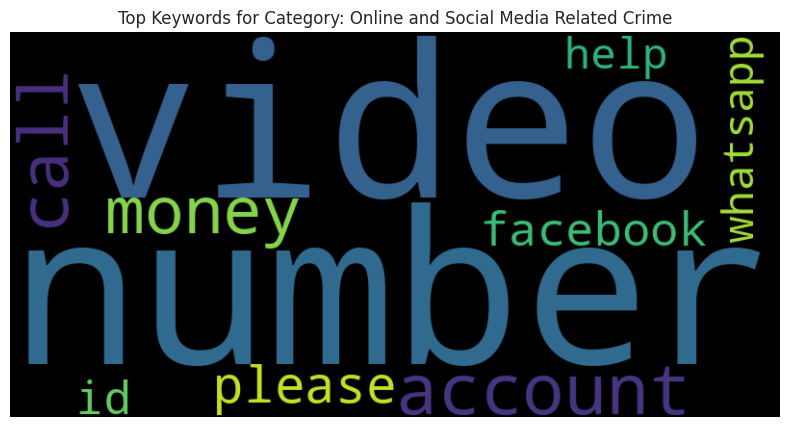

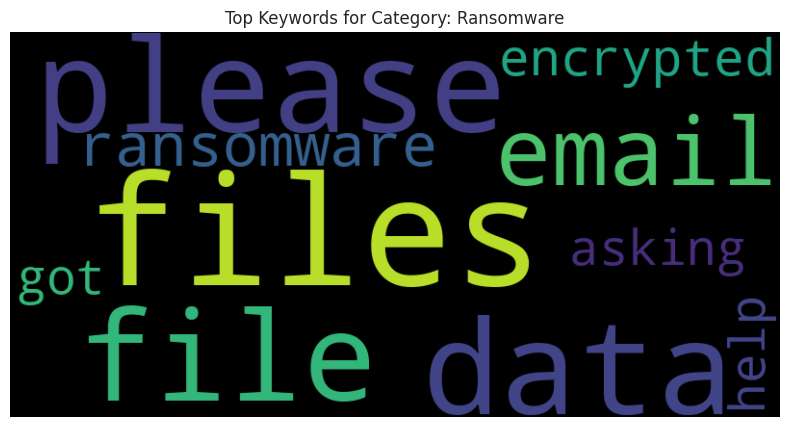

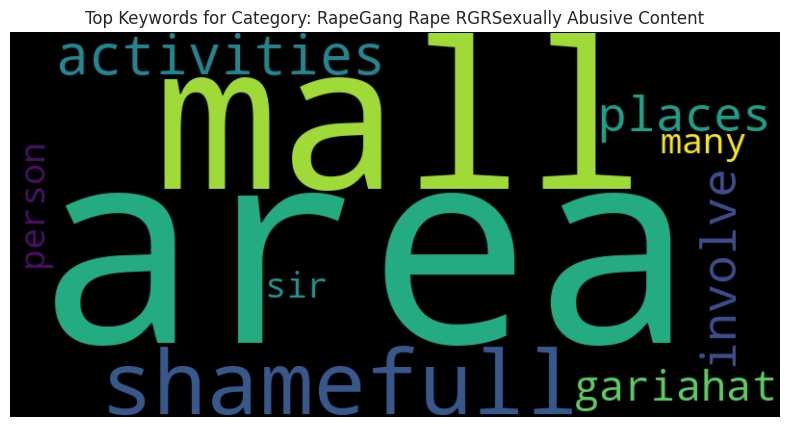

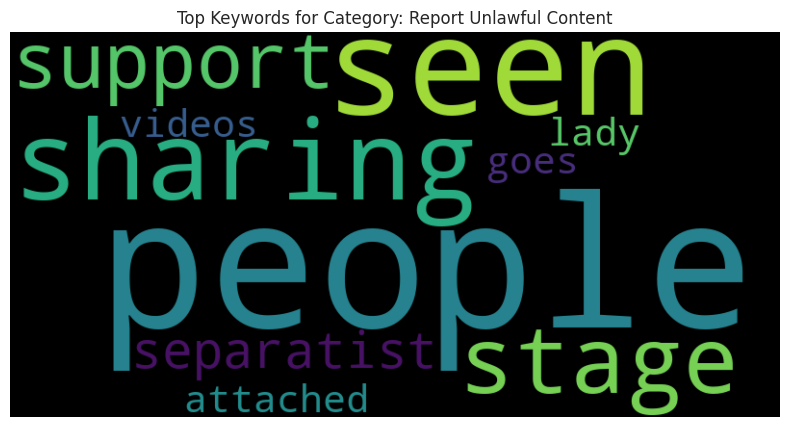

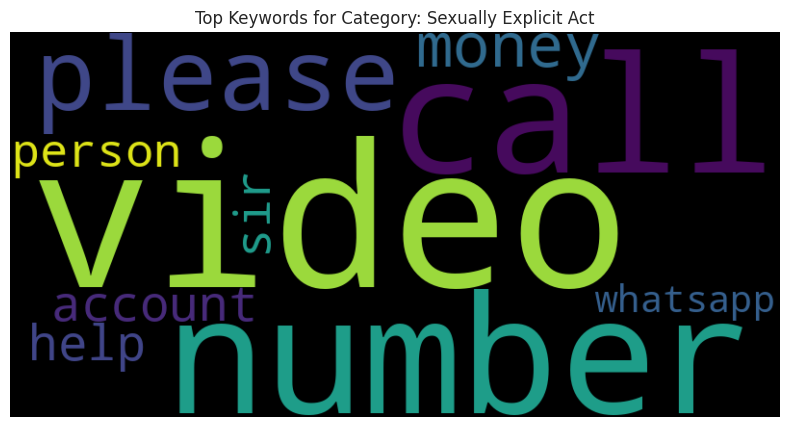

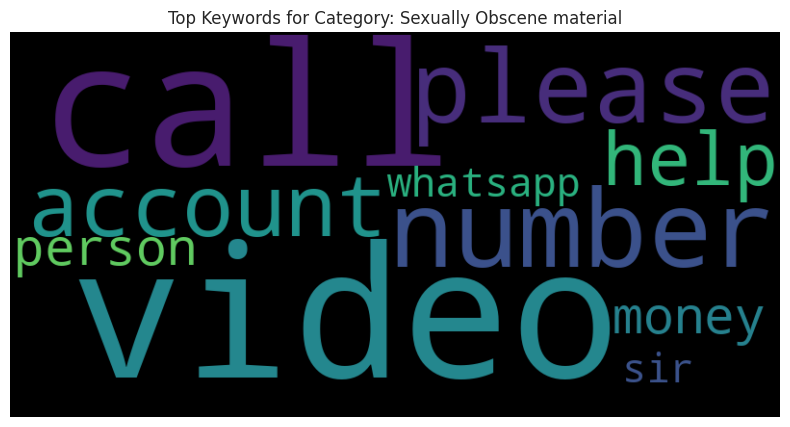

In [120]:
import pandas as pd
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')

# Load dataset (assuming it's already loaded as data0)
data0 = data0.copy()

# Step 1: Text Cleaning Function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = text.split()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Apply text cleaning to `crimeaditionalinfo` column
data0['cleaned_crimeinfo'] = data0['crimeaditionalinfo'].fillna('').apply(preprocess_text)

# Step 2: Common Keywords by Category
# Flatten tokens by category
category_keywords = data0.groupby('category')['cleaned_crimeinfo'].apply(lambda x: [item for sublist in x for item in sublist])

# Find the most common keywords for each category
category_top_keywords = {}
for category, words in category_keywords.items():
    counter = Counter(words)
    most_common = counter.most_common(10)  # Top 10 keywords
    category_top_keywords[category] = most_common

# Display top keywords for each category
for category, keywords in category_top_keywords.items():
    print(f"Category: {category}")
    print("Top Keywords:", keywords)
    print("\n")

# Step 3: Visualize the most common keywords using a WordCloud
# Generate a word cloud for each category
for category, keywords in category_top_keywords.items():
    wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(dict(keywords))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Top Keywords for Category: {category}")
    plt.show()


In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fill any missing values in the `crimeaditionalinfo` column with an empty string
data0['crimeaditionalinfo'] = data0['crimeaditionalinfo'].fillna('')

# Step 1: Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, min_df=5, stop_words='english')

# Step 2: Fit and transform the `crimeaditionalinfo` column
tfidf_matrix = tfidf_vectorizer.fit_transform(data0['crimeaditionalinfo'])

# Step 3: Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Optionally, join the TF-IDF features with the original data if needed
data_with_tfidf = data0.join(tfidf_df)

# Display the resulting TF-IDF DataFrame
print("TF-IDF Matrix Shape:", tfidf_df.shape)
print(tfidf_df.head())


TF-IDF Matrix Shape: (93686, 1000)
    aa  aadhar  aap  aapko  aaya   ab  abhi  able  abuse  abusing  ...  worst  \
0  0.0     0.0  0.0    0.0   0.0  0.0   0.0   0.0    0.0      0.0  ...    0.0   
1  0.0     0.0  0.0    0.0   0.0  0.0   0.0   0.0    0.0      0.0  ...    0.0   
2  0.0     0.0  0.0    0.0   0.0  0.0   0.0   0.0    0.0      0.0  ...    0.0   
3  0.0     0.0  0.0    0.0   0.0  0.0   0.0   0.0    0.0      0.0  ...    0.0   
4  0.0     0.0  0.0    0.0   0.0  0.0   0.0   0.0    0.0      0.0  ...    0.0   

   worth  wrong   ye  year  years  yes  yesterday  yono  youtube  
0    0.0    0.0  0.0   0.0    0.0  0.0        0.0   0.0      0.0  
1    0.0    0.0  0.0   0.0    0.0  0.0        0.0   0.0      0.0  
2    0.0    0.0  0.0   0.0    0.0  0.0        0.0   0.0      0.0  
3    0.0    0.0  0.0   0.0    0.0  0.0        0.0   0.0      0.0  
4    0.0    0.0  0.0   0.0    0.0  0.0        0.0   0.0      0.0  

[5 rows x 1000 columns]


In [122]:
import numpy as np

# Join the TF-IDF DataFrame with the category column
tfidf_with_category = pd.concat([data0['category'], tfidf_df], axis=1)

# Calculate the average TF-IDF score for each term within each category
tfidf_means = tfidf_with_category.groupby('category').mean()

# Display top 10 terms with the highest average TF-IDF score for each category
top_terms_per_category = {}
for category in tfidf_means.index:
    sorted_terms = tfidf_means.loc[category].sort_values(ascending=False).head(10)
    top_terms_per_category[category] = sorted_terms

# Display the top terms for each category
for category, terms in top_terms_per_category.items():
    print(f"\nTop terms for {category}:")
    print(terms)



Top terms for Any Other Cyber Crime:
loan       0.051672
money      0.044586
number     0.043985
rs         0.041334
account    0.030496
pay        0.028798
mobile     0.028676
help       0.026880
person     0.026673
app        0.026399
Name: Any Other Cyber Crime, dtype: float64

Top terms for Child Pornography CPChild Sexual Abuse Material CSAM:
sex         0.055662
photos      0.054420
video       0.051580
guy         0.049956
sir         0.048305
private     0.045298
action      0.045202
daily       0.043158
station     0.039397
whatsapp    0.037857
Name: Child Pornography CPChild Sexual Abuse Material CSAM, dtype: float64

Top terms for Cryptocurrency Crime:
app         0.084109
invested    0.083899
money       0.080654
group       0.073725
trading     0.048827
invest      0.047190
company     0.046130
withdraw    0.045019
profit      0.044644
help        0.038181
Name: Cryptocurrency Crime, dtype: float64

Top terms for Cyber Attack/ Dependent Crimes:
like       0.186845
fix    

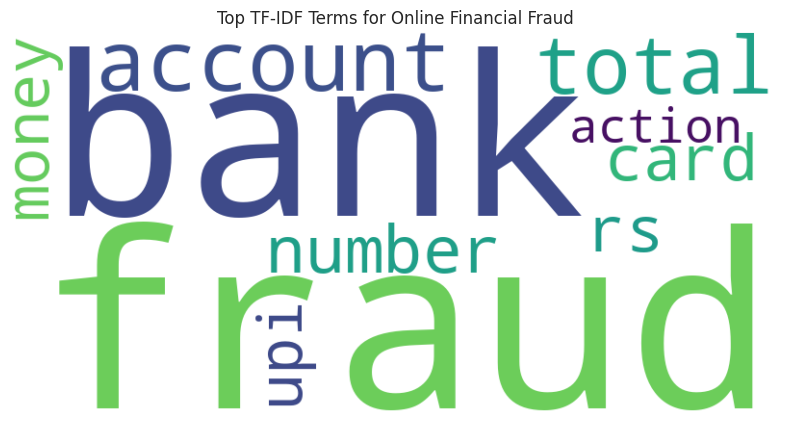

In [123]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Visualize top terms for a single category as an example
category_to_visualize = 'Online Financial Fraud'  # Change this to any category

# Generate a word cloud for the chosen category
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(
    top_terms_per_category[category_to_visualize])

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f"Top TF-IDF Terms for {category_to_visualize}")
plt.show()


In [124]:
from sklearn.utils import resample
import pandas as pd

# Define the desired number of samples for each category
desired_sample_size = 3000  # Adjust based on the dataset size and needs

# Separate the dataset by category
balanced_data = pd.DataFrame()  # Initialize an empty DataFrame for the balanced data

for category in data0['category'].unique():
    category_data = data0[data0['category'] == category]

    if len(category_data) > desired_sample_size:
        # If the category has more than the desired sample size, perform undersampling
        category_data = resample(category_data, replace=False, n_samples=desired_sample_size, random_state=42)
    else:
        # If the category has fewer than the desired sample size, perform oversampling
        category_data = resample(category_data, replace=True, n_samples=desired_sample_size, random_state=42)

    # Append the balanced data for this category to the main balanced dataset
    balanced_data = pd.concat([balanced_data, category_data])

# Shuffle the balanced dataset to mix categories
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the balanced data count
print(balanced_data['category'].value_counts())

category
Online Cyber Trafficking                                3000
RapeGang Rape RGRSexually Abusive Content               3000
Report Unlawful Content                                 3000
Any Other Cyber Crime                                   3000
Cryptocurrency Crime                                    3000
Sexually Obscene material                               3000
Hacking  Damage to computercomputer system etc          3000
Online and Social Media Related Crime                   3000
Ransomware                                              3000
Online Gambling  Betting                                3000
Sexually Explicit Act                                   3000
Cyber Terrorism                                         3000
Cyber Attack/ Dependent Crimes                          3000
Child Pornography CPChild Sexual Abuse Material CSAM    3000
Online Financial Fraud                                  3000
Name: count, dtype: int64


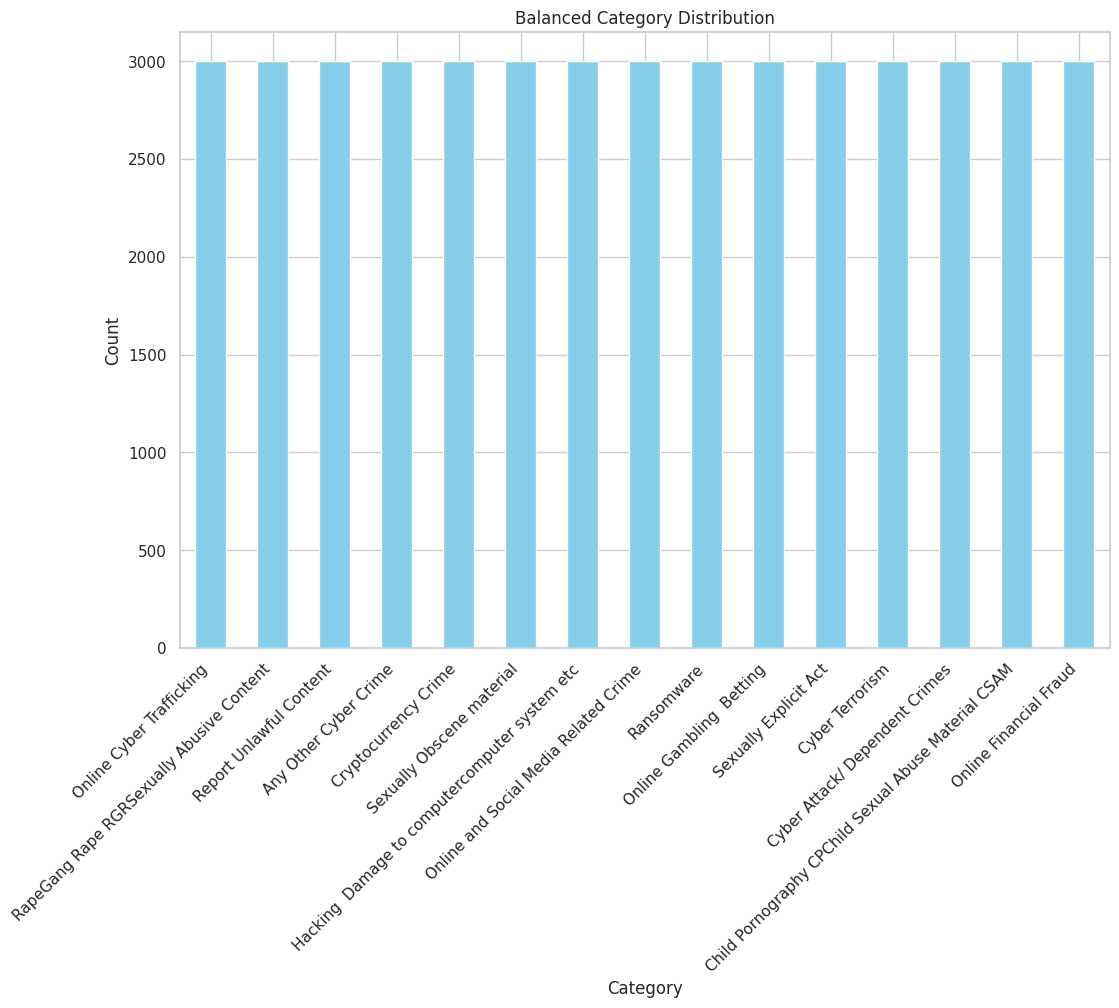

In [125]:
import matplotlib.pyplot as plt

# Plot the distribution of categories in the balanced dataset
plt.figure(figsize=(12, 8))
balanced_data['category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Balanced Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [126]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer for top terms
vectorizer = CountVectorizer(stop_words='english', max_features=10)

# Loop through each category and get the top terms
for category in balanced_data['category'].unique():
    # Filter data for the current category
    category_data = balanced_data[balanced_data['category'] == category]

    # Fit and transform the 'crimeaditionalinfo' text
    text_data = vectorizer.fit_transform(category_data['crimeaditionalinfo'].dropna())
    terms = vectorizer.get_feature_names_out()
    counts = text_data.toarray().sum(axis=0)

    # Create a DataFrame for terms and counts, sorted by count
    top_terms_df = pd.DataFrame({'term': terms, 'count': counts}).sort_values(by='count', ascending=False)

    print(f"\nTop terms for {category}:")
    print(top_terms_df)


Top terms for Online Cyber Trafficking:
      term  count
4   number   1589
3    money   1341
8      sir   1148
0  account   1111
9    video    993
2     help    880
6    phone    865
5      pay    846
7       rs    810
1      app    797

Top terms for RapeGang Rape RGRSexually Abusive Content:
         term  count
1        area  22085
4        mall  13800
0  activities  11040
7   shamefull  11040
6      places   8284
2    gariahat   8280
3     involve   8280
8         sir   5646
5      person   5625
9       women   5533

Top terms for Report Unlawful Content:
         term  count
3      people  12000
5        seen   6000
6  separatist   6000
7     sharing   6000
8       stage   6000
9     support   6000
0       abuse   3000
1        nadu   3000
2    narendra   3000
4    platform   3000

Top terms for Any Other Cyber Crime:
      term  count
5   number   1775
4    money   1558
3     loan   1413
9       rs   1334
0  account   1301
6      pay    941
8    phone    879
2      hai    870
1

In [129]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk
import re

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Text preprocessing function
def preprocess_text(text):
    text = re.sub(r'\W', ' ', str(text))  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

# Apply preprocessing
balanced_data['cleaned_crimeinfo'] = balanced_data['crimeaditionalinfo'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [130]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=3000)  # Adjust max_features based on available memory and model needs

# Transform the 'crimeaditionalinfo' column into TF-IDF features
X_text = tfidf_vectorizer.fit_transform(balanced_data['crimeaditionalinfo'])

In [131]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
from scipy.sparse import hstack

# Encode the category labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(balanced_data['category'])

# Combine TF-IDF features with any additional features if needed
X = X_text  # Add other features to this if available, e.g., X = hstack([X_text, additional_features])


In [132]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Initialize the classifier
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.6831111111111111

Classification Report:
                                                       precision    recall  f1-score   support

                               Any Other Cyber Crime       0.38      0.36      0.37       610
Child Pornography CPChild Sexual Abuse Material CSAM       0.68      0.62      0.65       566
                                Cryptocurrency Crime       0.80      0.88      0.84       589
                      Cyber Attack/ Dependent Crimes       1.00      1.00      1.00       601
                                     Cyber Terrorism       0.85      0.71      0.78       619
      Hacking  Damage to computercomputer system etc       0.39      0.64      0.49       576
                            Online Cyber Trafficking       0.83      0.67      0.74       617
                              Online Financial Fraud       0.64      0.64      0.64       592
                            Online Gambling  Betting       0.69      0.63      0.66       630
     

In [139]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset here (if not already loaded)
# data = pd.read_csv("your_data.csv")

# Vectorize the 'crimeaditionalinfo' column using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=2000)  # Limiting features for efficiency
X_text = tfidf_vectorizer.fit_transform(data0['crimeaditionalinfo'].fillna(''))  # Handle any null values

# Prepare the target variable
y = data0['category_encoded']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.3, random_state=42)

# Train the Multinomial Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)


Accuracy: 0.7368533409236462

Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.29      0.31      3155
           1       0.95      0.19      0.32       103
           2       0.73      0.06      0.12       128
           3       1.00      1.00      1.00      1128
           4       0.00      0.00      0.00        59
           5       0.33      0.18      0.23       511
           6       0.00      0.00      0.00        53
           7       0.84      0.89      0.87     17276
           8       0.00      0.00      0.00       155
           9       0.49      0.64      0.56      3634
          10       0.00      0.00      0.00        17
          11       1.00      0.91      0.95       835
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00       490
          14       1.00      0.00      0.01       561

    accuracy                           0.74     28106
   macro avg       0.45   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
